density_circle.ipynb

Discussion: Nonuniform sampling = density function; circular region

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 08 November 2016

Author: John Burkardt, Lukas Bystricky

In [1]:
# Import necessary libraries and set plot option
%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# More about Density Functions #

In the previous notebook, we looked at how density functions affect the 
computation of centers of mass and the CVT iteration, in a triangle and
a square.  We used uniform sampling, and a density function rho(x,y).
It turns out that we can combine sampling and nonuniform density into
a single operation, a nonuniform sampling method.  This simply picks
some points more often than others.  If we can find an appropriate
nonuniform sampling method, then the CVT iteration is simplified.

We will look at:
* using nonuniform sampling in a circle as another way to enforce a density.
* displaying plots of the data during a CVT iteration.
* adding the boundary or Voronoi diagram to such plots

#  Sample the circle nonuniformly #

There are actually two ways of computing a CVT with a density function.

Way number 1:
* Uniformly randomly sample the region;
* Compute the density function at each sample point;
* Modify calculations using weighted averaging
  
Way number 2:
* Modify the sampling technique for "weighted" random sampling.
* The rest of the CVT algorithm behaves as though it was a uniform problem.
  
Let's try to look at the circle this way.  We know how to sample uniformly.
Instead, let's do a nonuniform sampling, like this:
```python
def circle_sample_nonuniform ( m )
  import numpy as np
  s = np.zeros ( [ m, 2 ] )
  r = np.random.random ( m )
  t = 2.0 * np.pi * np.random.random ( m )
  s[:,0] = r * np.cos ( t )
  s[:,1] = r * np.sin ( t )
  return s
```

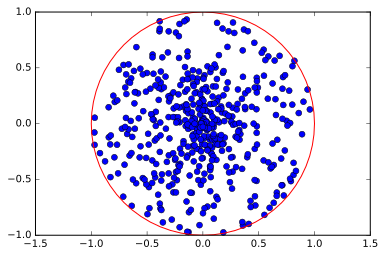

In [2]:
# Function to sample the circle nonuniformly

def circle_sample_nonuniform ( m ):
  import numpy as np
  s = np.zeros ( [ m, 2 ] )
  r = np.random.random ( m )
  t = 2.0 * np.pi * np.random.random ( m )
  s[:,0] = r * np.cos ( t )
  s[:,1] = r * np.sin ( t )
  return s
#
#  Test the function. 
#
m = 500
s = circle_sample_nonuniform ( m )
plt.plot ( s[:,0], s[:,1], 'bo' )
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )
#
#  There seem to be various ways in MATPLOTLIB to draw a circle.
#  I can't get them to work.  So I did it this way.
#
c = np.zeros ( [65, 2 ] )
t = np.linspace ( 0, 2.0*np.pi, 65)
c[:,0] = np.cos ( t )
c[:,1] = np.sin ( t )
plt.plot ( c[:,0], c[:,1], 'r' )

# CVT step for Circle, using nonuniform sampling #

Once we have our nonuniform sampling method, the CVT step
can be written as though we were solving a uniform problem
with no weighting.  

You can more or less copy the CVT code we used for the
square with uniform sampling, and then just change the name
of the sampling function:
```python
def cvt_step_circle_nonuniform ( g, m ):
  import numpy as np
  s = circle_sample_nonuniform ( m )
  ***
  return c
```

In [3]:
#  Code for CVT step for Circle, using nonuniform sampling.
#
def cvt_step_circle_nonuniform ( g, m ):
  import numpy as np
  s = circle_sample_nonuniform ( m )
  n = g.shape[0]
  ni = np.zeros ( n )
  c = np.zeros ( [ n, 2 ] )
  for i in range ( 0, m ):
    k = -1
    d = np.Inf
    for j in range ( 0, n ):
      dj = np.linalg.norm ( s[i,:] - g[j,:] )
      if ( dj < d ):
        d = dj
        k = j
    ni[k] = ni[k] + 1
    c[k,:] = c[k,:] + s[i,:]
    
  for i in range ( 0, n ):
    if ( ni[i] == 0 ):
      c[i,:] = g[i,:]
    else:
      c[i,:] = c[i,:] / float ( ni[i] )
        
  return c

#
#  Test the function.
#  We just expect C values to be near G values.
#
n = 3
g = np.array ( [ \
  [  0.0 ,0.0 ], \
  [  0.2, 0.2 ], \
  [ -0.1, 0.3 ] ] )

m = 5000
c = cvt_step_circle_nonuniform ( g, m )

for i in range ( 0, n ):
  print ( '%2d  %8.4f  %8.4f  %8.4f  %8.4f' % ( i, g[i,0], g[i,1], c[i,0], c[i,1] )  )


 0    0.0000    0.0000   -0.0672   -0.2790
 1    0.2000    0.2000    0.4716    0.2041
 2   -0.1000    0.3000   -0.3314    0.4111


# CVT iteration for Circle with Nonuniform Density #

As usual, the CVT step is the hard part of the coding.
To do a CVT iteration, we just need to initialize the
generators, and then carry out a loop that repeatedly
computes centers of mass C and uses them to overwrite G.
```python
def cvt_circle_nonuniform ( n, m, step_num ):
  g = circle_sample_nonuniform ( m )
  for step in range ( 0, step_num ):
  ***
  return g
```

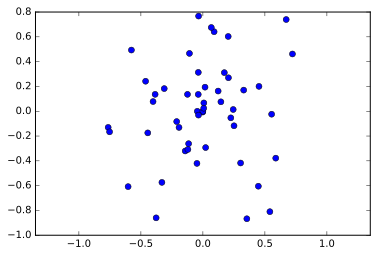

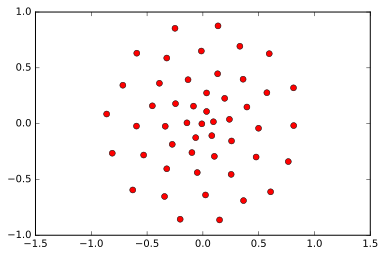

What?


In [4]:
# Code for CVT iteration for circle with nonuniform density
#
import matplotlib.pyplot as plt

def cvt_circle_nonuniform ( n, m, step_num ):
  g = circle_sample_nonuniform ( n )
  plt.plot ( g[:,0], g[:,1], 'bo' )
  plt.axis ( 'Equal')
  plt.show ( )
  
  for step in range ( 0, step_num ):
    c = cvt_step_circle_nonuniform ( g, m )
    g = c.copy ( )
    
  plt.plot ( g[:,0], g[:,1], 'ro' )
  plt.axis ( 'Equal' )
  plt.show ( )
  return g

#
#  Test the function.
#
n = 50
m = 10000
step_num = 10
g = cvt_circle_nonuniform ( n, m, step_num )

# Overlay the circular boundary on the plots

Modify the cvt_circle_nonuniform code so that the two plots of
the generators now also include a red circle, indicating the
boundary of the region.
```python
def cvt_circle_nonuniform2 ( n, m, step_num ):
  t = np.linspace ( n, m, step_num ):
  xc = np.cos ( t )
  yc = np.sin ( t )
  ***
  return g
```
Although MATPLOTLIB apparently has ways to draw a circle, I
could not get them to work for me, so I just computed 50
points on a circle and plotted them.

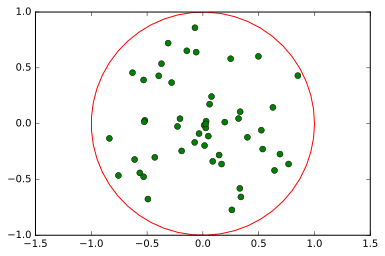

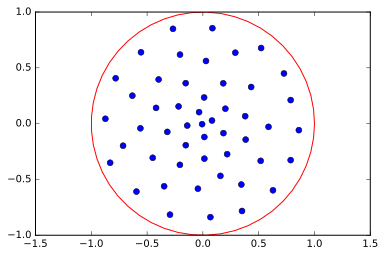

In [10]:
# Code for CVT iteration for circle with nonuniform density
#
import matplotlib.pyplot as plt

def cvt_circle_nonuniform2 ( n, m, step_num ):
    
  t = np.linspace ( 0, 2.0 * np.pi, 50 )
  xc = np.cos ( t )
  yc = np.sin ( t )

  g = circle_sample_nonuniform ( n )
  plt.plot ( g[:,0], g[:,1], 'go' )
  plt.plot ( xc, yc, 'r-')
  plt.axis ( 'Equal')
  plt.show ( )
  
  for step in range ( 0, step_num ):
    c = cvt_step_circle_nonuniform ( g, m )
    g = c.copy ( )
    
  plt.plot ( g[:,0], g[:,1], 'bo' )
  plt.plot ( xc, yc, 'r-')
  plt.axis ( 'Equal' )
  plt.show ( )
  return g

#
#  Test the function.
#
n = 50
m = 10000
step_num = 10
g = cvt_circle_nonuniform2 ( n, m, step_num )




# Overlay the Voronoi diagram on the plots.

Instead of showing the circular boundary, we could show the
Voronoi diagram.
```python
def cvt_circle_nonuniform3 ( n, m, step_num ):
  g = circle_sample_nonuniform ( n )
  vor = spatial.Voronoi ( g )
  spatial.voronoi_plot_2d ( vor )
  ***
  return g
```

Unfortunately, the Voronoi diagram plotting routine does not
make a very good judgment about the size of the plot, so that
sometimes the interesting part of the plot is much too small.

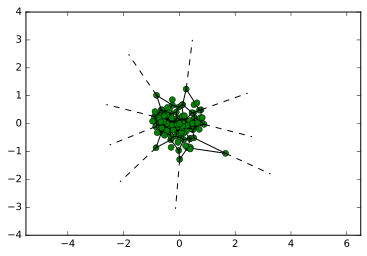

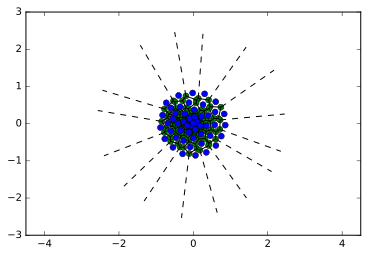

In [9]:
# Code for CVT iteration for circle with nonuniform density
#
import matplotlib.pyplot as plt

def cvt_circle_nonuniform3 ( n, m, step_num ):
  g = circle_sample_nonuniform ( n )
  vor = spatial.Voronoi ( g )
  spatial.voronoi_plot_2d ( vor )
  plt.plot ( g[:,0], g[:,1], 'go' )
  plt.axis ( 'Equal')
  plt.show ( )
  
  for step in range ( 0, step_num ):
    c = cvt_step_circle_nonuniform ( g, m )
    g = c.copy ( )
    
  vor = spatial.Voronoi ( g )
  spatial.voronoi_plot_2d ( vor )
  plt.plot ( g[:,0], g[:,1], 'bo' )
  plt.axis ( 'Equal' )
  plt.show ( )
  return g

#
#  Test the function.
#
n = 50
m = 10000
step_num = 10
g = cvt_circle_nonuniform3 ( n, m, step_num )


